# Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

1 input:

$y = W_0 + x\cdot W_1$

2 inputs:

$y = W_0 + x_0\cdot W_1 + x_1\cdot W_2$


### Data:

Input: $x \in \mathbb{R}^d$ called: measurements, covariates, features, indepen. variables

Output: $y \in \mathbb{R}$ called: response, dependent variable

### Goal:

Create function which maps $f: \mathbb{R}^d \to \mathbb{R}$

$y \approx f(x; w)$

with data pair (x, y)

and free variable (weight in this case), w

##### This is a regresion function

A linear regression function is where the prediction f, is a linear function of the unkown parameter w

### Model

$y \approx f(x; w) = w_0 + \sum^d_{j=1}x_{ij}w_j$

with j = each feature and i = each value

We need an objective funtion to tell us best value of w

### Least squares Loss function

we're using sum of square errors

$w_{LS} = arg \min_w \sum^n_{i=1}(y_i - f(x_i; w))^2 = arg \min_w L$

#### So our linear relationship is:

$y_i = w_0 + \sum^d_{j=1}x_{ij}w_j + \epsilon_i$

- $w_0$ is our bias
- j = each feature
- i = each input value

we want to minimize:

$L = \sum^n_{i=1}\epsilon_i^2 = \sum^n_{i=1} \left(y_i - w_0 - \sum^d_{j=1}x_{ij}w_j\right)^2$

- n = number of data points
- i = current datapoint
- d = dimensions/ features
- j = current feature

### Vectors and Matrices

each input data set is a column vector of dimensions d (number of features)

A set of n number of these vectors can all be transposed and stacked into a matrix

so each coloumn is a different feature

and each row is a new data point

#### Assumptions:

All features are treated as continuous-valued ($x \in \mathbb{R}^d$)

We have more observations than dimensions (d < n) ie. more datapoints than features

### $w_0$

we add a 1 at the front of each datapoint vector like it was a feature

we add another row to the $w_1$ to be able to multiply by the x values

this means $w_0$ will still get added on to the multiplied value as matrix multiplication adds all feature values together

our only weight is now w

w = $\begin{bmatrix}
    w_{0}       & w_{1} & w_{2} & \dots & w_{d}
\end{bmatrix}^T$ and $w \in \mathbb{R}^d+1$

#### So our new least squares function using vectors is:

old: $L = \sum^n_{i=1} \left(y_i - w_0 - \sum^d_{j=1}x_{ij}w_j\right)^2$

new: $L = \sum^n_{i=1} \left(y_i - x_{i}^Tw\right)^2$

### Vector method

we want the loss as low as possible

at the lowest point, the losses gradient = 0

$\triangledown_wL = 0$

$\sum^n_{i=1}\triangledown_w \left(y_i - x_{i}^Tw\right)^2 = 0$

$\sum^n_{i=1}\triangledown_w \left(y_i^2 - 2w^Tx_iy_i + w^Tx_ix_i^Tw\right) = 0$

$-\sum^n_{i=1}2y_ix_i+\left(\sum^n_{i=1}2x_ix_i^T\right)w = 0$

$w_{LS} = \left(\sum^n_{i=1}x_ix_i^T\right)^{-1}\left(\sum^n_{i=1}y_ix_i\right)$

### Matrix method

$y_i$ is a column vector

$L = \sum^n_{i=1} \left(y_i - x_{i}^Tw\right)^2$

with X as our matrix defined above:

$= \|y − Xw\|^2$

$= (y − Xw)^T(y − Xw)$

now we equate the gradient to 0

$\triangledown_wL = 2X^TXw - 2X^Ty = 0$

$w_{LS} = (X^TX)^{-1} X^Ty$

## Final notation

$w_{LS} = \left(\sum^n_{i=1}x_ix_i^T\right)^{-1}\left(\sum^n_{i=1}y_ix_i\right) \Leftrightarrow w_{LS} = (X^TX)^{-1} X^Ty$

## Predictions:

$$y_{new} \approx x_{new}^Tw_{LS}$$

## Issues

when calculating $(X^TX)^{-1} X^Ty$, we dont know if $(X^TX)^{-1}$ is possible

We are assuming n > d so number of data points is larger than features

When x isnt a full rank matrix, it doesnt work

with this issue there would be lots of different lines/hyperplanes

## Polynomial Regression

Regression is linear when the funciton on w, the unknown parameter is linear

eg. $$y = w_0 + w_1x + w_2x^2 ...$$

it works in th same way except preprocessing is different.

Using the matrix approach, the matrix will be

X = 
$\begin{bmatrix}
    1      & x_1    & x_{1}^2 & \dots  & x_{1}^p \\
    1      & x_2    & x_{2}^2 & \dots  & x_{2}^p \\
    1      & x_3    & x_{3}^2 & \dots  & x_{3}^p \\
    \vdots & \vdots & \vdots  & \ddots & \vdots  \\
    1      & x_n    & x_{n}^2 & \dots  & x_{n}^p \\
\end{bmatrix}$

for pth order polynomial and $(x_1, y_1)...(x_n,y_n)$ as our data pairs and $x \in \mathbb{R}$, $y \in \mathbb{R}$

we then solve it the same way:

$w_{LS} = (X^TX)^{-1} X^Ty$

## Polynomial regrassion in $\mathbb{R}^2$

with pth order polynomial

The X matrix grows in width

there is a column for every feature and feature up to the power of p

eg. $$y = w_0 + w_1x_{i1} + w_2x_{i2} + w_3x_{i1}^2 + w_2x_{i2}^2 ...$$

with i as each datapoint, and 2 inputs

As long as the function is linear in $w_1,..., w_S$, we can construct the matrix X by putting the transformed $x_i$ on row i, and solve

$w_{LS} = (X^TX)^{-1} X^Ty$

note: as the function increase, its more prone to overfitting so we need more data

## 1 input, linear function of x

In [53]:
# set parameters
num_examples = 101          # number of data points
iterations = 10             # number of times to train over the whole dataset
learning_rate = 0.001       # learning rate

# set constants for line function
A = 4
B = 1

In [54]:
# create x values
x = np.linspace(0, 10, num_examples).reshape(-1,1).astype(np.float32)

# create a function for our line
def f(x):
    return A*x + B

# set y to our function
y = f(x)

x_no_noise = np.copy(x)
y_no_noise = np.copy(y)

# add noise to x and y dimensions
x += np.random.randn(num_examples, 1)
y += np.random.randn(num_examples, 1)

# put a column of ones at the front for the bias
x_train_data = np.hstack((np.ones(shape=(num_examples, 1)), x))
x_test_data = np.hstack((np.ones(shape=(num_examples, 1)), x_no_noise))

In [55]:
# set placeholders for inputs and labels
x_placeholder = tf.placeholder(shape=(1, 2), dtype=tf.float32)
y_placeholder = tf.placeholder(shape=(1), dtype=tf.float32)

# define our only weight, 2 values, w0 and w1
W = tf.Variable(tf.random_normal(shape=(2,1)), dtype=tf.float32)

# run session
sess = tf.InteractiveSession()
# initialize variables
tf.global_variables_initializer().run()


# this is our only function for mapping the input to the output
y_val = tf.matmul(x_placeholder, W)

# define the loss and optimizer
loss = (y_placeholder-y_val)**2
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)


In [56]:
losses = np.array([])       # array to hold our losses for each iteration
it_losses = np.array([])    # array to hold our losses for value in an iteration

# train for each iteration
for i in range(iterations):
    # for each value in the graph
    for val in range(x_train_data[:, 0].size):
        
        # run the training and record the loss
        _, l = sess.run([train, loss], 
                               feed_dict={
                                   x_placeholder: x_train_data[val].reshape(1, 2), 
                                   y_placeholder : y[val]
                               })
        
        # append to array with all error for current iteration
        it_losses = np.append(it_losses, l)
        
    # append the mean error for most recent iteration
    losses = np.append(losses, np.mean(it_losses))
    

In [57]:
test_y_vals = np.array([])  # array to hold test outputs

# run the test
for i in range(x_test_data[:, 0].size):
    
    # get predicted y values and append them to array
    test_y_val = sess.run(y_val, feed_dict={x_placeholder: x_test_data[i].reshape(1, 2)})
    test_y_vals = np.append(test_y_vals, test_y_val)

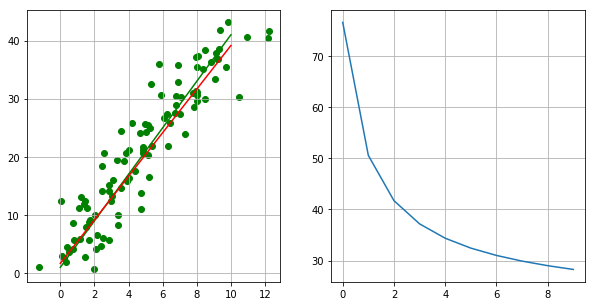

predicted: y = [ 3.74754262] x + [ 1.67842245]
real: y = 4 x + 1


In [58]:
# set up plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(x, y, color='green')
ax[0].plot(x_no_noise, f(x_no_noise), color='green')
ax[0].plot(x_no_noise, test_y_vals, color='red')

ax[1].plot(losses)

for axes in ax:
    axes.grid(True)
plt.show()

# print real and learnt funcion
b, a = W.eval()
print 'predicted: y =',a,'x +',b
print 'real: y =',A,'x +',B

In [60]:
si = np.linalg.matrix_power(np.matmul(np.transpose(x_test_data), x_test_data), -1)

sa = np.matmul(np.transpose(x_test_data), y)

fin = np.matmul(si,sa)

print 'predicted: y =',fin[1],'x +',fin[0]
print 'real: y =',A,'x +',B

predicted: y = [ 4.03663489] x + [ 0.82710914]
real: y = 4 x + 1


## 2 Inputs, Linear function of x

In [61]:
num_examples = 11
iterations = 10
learning_rate = 0.001
z_vals = np.empty((num_examples, num_examples))
it_losses = np.array([])
losses = np.array([])

A = 2
B = 7
C = 5

In [62]:
X = np.linspace(0, 10, num_examples)
Y = np.linspace(0, 10, num_examples)
x, y = np.meshgrid(X, Y)

def f(x, y):
    return A*x+B*y+C

z = f(x, y)

x_no_noise = np.copy(x)
y_no_noise = np.copy(y)


z += np.random.randn(num_examples, num_examples)
x += np.random.randn(num_examples, num_examples)
y += np.random.randn(num_examples, num_examples)

ones_array = np.ones(shape=(num_examples**2, 1))

x_train = np.hstack((ones_array, x.reshape(-1, 1), y.reshape(-1, 1))).astype(np.float32)
x_test = np.hstack((ones_array, x_no_noise.reshape(-1, 1), y_no_noise.reshape(-1, 1))).astype(np.float32)

In [63]:
xy_placeholder = tf.placeholder(shape=(1, 3), dtype=tf.float32)
z_placeholder = tf.placeholder(shape=(1), dtype=tf.float32)

sess = tf.InteractiveSession()
    
W = tf.Variable(tf.random_normal(shape=(3,1)), dtype=tf.float32)


sess.run(tf.global_variables_initializer())

z_val = tf.matmul(xy_placeholder, W)
loss = (z_placeholder-z_val)**2
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [64]:
for i in range(iterations):
    for val in range(x_train[:, 0].size):
        
        curr_x = int(x_test[val, 1])
        curr_y = int(x_test[val, 2])
        

        _, l = sess.run([train, loss], 
                               feed_dict={
                                   xy_placeholder: x_train[val].reshape(1, 3), 
                                   z_placeholder : z[curr_y, curr_x].reshape(1)
                               })
        
        it_losses = np.append(it_losses, l)
        
    losses = np.append(losses, np.mean(it_losses))
    
    


In [65]:
for val in range(x_train[:, 0].size):
    
    curr_x = int(x_test[val, 1])
    curr_y = int(x_test[val, 2])

    curr_z_val = sess.run(z_val, 
                     feed_dict={
                         xy_placeholder: x_test[val].reshape(1, 3)
                     })
    
    z_vals[curr_y, curr_x] = curr_z_val
    


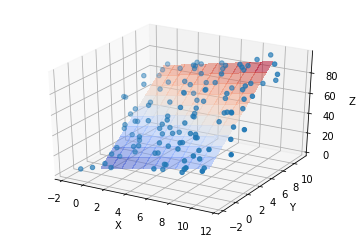

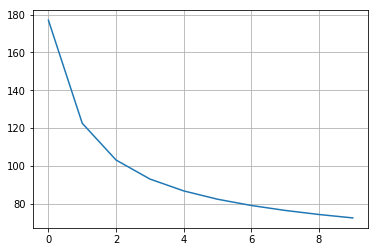

predicted: z =  [ 2.20570731] x +  [ 6.83810902] y + [ 2.97069144]
real: z =  2 x +  7 y + 5


In [66]:
fig = plt.figure()
ax = fig.gca(projection='3d')
    
ax.scatter(x, y, z, cmap=cm.coolwarm)
ax.plot_surface(x_no_noise, y_no_noise, z_vals, cmap=cm.coolwarm,linewidth=0, antialiased=False, alpha=0.5)


fig2, ax2 = plt.subplots()

ax2.plot(losses)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.grid(True)
plt.show()

c, a, b = W.eval()
print 'predicted: z = ', a, 'x + ', b, 'y +',  c
print 'real: z = ', A, 'x + ', B, 'y +',  C

In [67]:
si = np.linalg.matrix_power(np.matmul(np.transpose(x_test), x_test), -1)

sa = np.matmul(np.transpose(x_test), z.reshape(-1,1))

fin = np.matmul(si,sa)

print 'predicted: z = ', fin[1], 'x + ', fin[2], 'y +',  fin[0]
print 'real: z = ', A, 'x + ', B, 'y +',  C

predicted: z =  [ 2.0153276] x +  [ 6.98659858] y + [ 4.9781314]
real: z =  2 x +  7 y + 5


## 1 Input, polynomial function of x

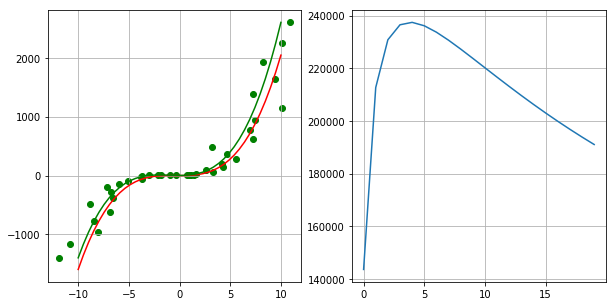

predicted: y = [ 1.82681239] x^3 + [ 2.25860405] x^2 + [-0.63039005] x + [-0.71847093]
real: y = 2 x^3 + 6 x^2 + 0 x + 2


In [69]:
# set parameters
num_examples = 40
iterations = 20
learning_rate = 0.0000003

test_y_vals = np.array([])
losses = np.array([])
it_losses = np.array([])    
weights = 4                 

# set constants for line function
A = 2
B = 6
C = 0
D = 2

# create x values
x = np.linspace(-10, 10, num_examples).reshape(-1,1).astype(np.float32)
x_no_noise = np.copy(x)

# create a function for our line
def f(x):
    return A*x**3 + B*x**2 + C*x + D

# set y to our function
y = f(x)

# add noise to x and y dimensions
x += np.random.randn(num_examples, 1)
y += np.random.randn(num_examples, 1)

# put a column of ones at the front for the bias
x_train_data = np.hstack((np.ones(shape=(num_examples, 1)), x**3, x**2, x))
x_test_data = np.hstack((np.ones(shape=(num_examples, 1)), x_no_noise**3, x_no_noise**2, x_no_noise))

# set placeholders for inputs and labels
x_placeholder = tf.placeholder(shape=(1, weights), dtype=tf.float32)
y_placeholder = tf.placeholder(shape=(1), dtype=tf.float32)

# run session
sess = tf.InteractiveSession()
    
# define our only weight, 2 values, w0 and w1
W = tf.Variable(tf.random_normal(shape=(weights,1)), dtype=tf.float32)

# initialize variables
tf.global_variables_initializer().run()

# this is our only function for mapping the input to the output
y_val = tf.matmul(x_placeholder, W)

# define the loss and optimizer
loss = (y_placeholder-y_val)**2
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# train for each iteration
for i in range(iterations):
    # for each value in the graph
    for val in range(x_train_data[:, 0].size):
        
        # run the training and record the loss
        _, l = sess.run([train, loss], 
                               feed_dict={
                                   x_placeholder: x_train_data[val].reshape(1, weights), 
                                   y_placeholder : y[val]
                               })
        
        # append to array with all error for current iteration
        it_losses = np.append(it_losses, l)
        
    # append the mean error for most recent iteration
    losses = np.append(losses, np.mean(it_losses))
    
# run the test
for i in range(x_test_data[:, 0].size):
    
    # get predicted y values and append them to array
    test_y_val = sess.run(y_val, feed_dict={x_placeholder: x_test_data[i].reshape(1, weights)})
    test_y_vals = np.append(test_y_vals, test_y_val)

# set up plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(x, y, color='green')
ax[0].plot(x_no_noise, test_y_vals, color='red')
ax[0].plot(x_no_noise, f(x_no_noise), color='green')

ax[1].plot(losses)

for axes in ax:
    axes.grid(True)
plt.show()

# print real and learnt funcion
d, a, b, c = W.eval()
print 'predicted: y =',a,'x^3 +',b, 'x^2 +', c, 'x +', d
print 'real: y =',A,'x^3 +',B, 'x^2 +', C, 'x +', D

In [71]:
si = np.linalg.matrix_power(np.matmul(np.transpose(x_test_data), x_test_data), -1)

sa = np.matmul(np.transpose(x_test_data), y)

fin = np.matmul(si,sa)

print 'predicted: y =',fin[1],'x^3 +',fin[2], 'x^2 +', fin[3], 'x +', fin[0]
print 'real: y =',A,'x^3 +',B, 'x^2 +', C, 'x +', D

predicted: y = [ 1.99970552] x^3 + [ 6.00369336] x^2 + [-0.0279491] x + [ 1.70996412]
real: y = 2 x^3 + 6 x^2 + 0 x + 2


## 2 Inputs, Polynomial function of x

In [72]:
num_examples = 11
iterations = 100
learning_rate = 0.000001
z_vals = np.empty((num_examples, num_examples))
it_losses = np.array([])
losses = np.array([])

A = 2
B = 7
C = 2
D = 7
E = 5

In [73]:
X = np.linspace(0, 10, num_examples)
Y = np.linspace(0, 10, num_examples)
x, y = np.meshgrid(X, Y)

def f(x, y):
    return A*x**2+B*y**2+C*x+D*y+E

z = f(x, y)

x_no_noise = np.copy(x)
y_no_noise = np.copy(y)


z += np.random.randn(num_examples, num_examples)
x += np.random.randn(num_examples, num_examples)
y += np.random.randn(num_examples, num_examples)


ones_array = np.ones(shape=(num_examples**2, 1))

x_train = np.hstack((
    ones_array, 
    x.reshape(-1, 1), 
    y.reshape(-1, 1), 
    x.reshape(-1, 1)**2, 
    y.reshape(-1, 1)**2
)).astype(np.float32)

x_test = np.hstack((
    ones_array, 
    x_no_noise.reshape(-1, 1), 
    y_no_noise.reshape(-1, 1), 
    x_no_noise.reshape(-1, 1)**2, 
    y_no_noise.reshape(-1, 1)**2
)).astype(np.float32)

In [74]:
xy_placeholder = tf.placeholder(shape=(1, 5), dtype=tf.float32)
z_placeholder = tf.placeholder(shape=(1), dtype=tf.float32)

sess = tf.InteractiveSession()
    
W = tf.Variable(tf.random_normal(shape=(5,1)), dtype=tf.float32)


sess.run(tf.global_variables_initializer())

z_val = tf.matmul(xy_placeholder, W)
loss = (z_placeholder-z_val)**2
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [75]:
for i in range(iterations):
    for val in range(x_train[:, 0].size):
        
        curr_x = int(x_test[val, 1])
        curr_y = int(x_test[val, 2])

        _, l = sess.run([train, loss], 
                               feed_dict={
                                   xy_placeholder: x_train[val].reshape(1, 5), 
                                   z_placeholder : z[curr_y, curr_x].reshape(1)
                               })
        
        it_losses = np.append(it_losses, l)
        
    losses = np.append(losses, np.mean(it_losses))
    
    


In [76]:
for val in range(x_test[:, 0].size):
    
    curr_x = int(x_test[val, 1])
    curr_y = int(x_test[val, 2])

    curr_z_val = sess.run(z_val, 
                     feed_dict={
                         xy_placeholder: x_test[val].reshape(1, 5)
                     })
    
    z_vals[curr_y, curr_x] = curr_z_val
    


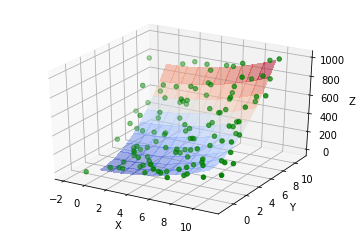

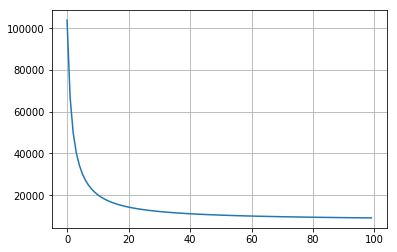

z =  [ 1.30038548] x^2 +  [ 1.70129037] y^2 + [ 2.26584911] x + [ 7.38754988] y + [-1.23404229]
z =  2 x^2 +  7 y^2 + 2 x + 7 y + 5
[ 1.30038548] 2
[ 1.70129037] 7
[ 2.26584911] 2
[ 7.38754988] 7
[-1.23404229] 5


In [77]:
fig = plt.figure()
ax = fig.gca(projection='3d')
    
ax.scatter(x, y, z, c='green')
ax.plot_surface(x_no_noise, y_no_noise, z_vals, cmap=cm.coolwarm,linewidth=0, antialiased=False, alpha=0.5)


fig2, ax2 = plt.subplots()

ax2.plot(losses)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.grid(True)
plt.show()

e, a, b, c, d = W.eval()
print 'predicted: z = ', a, 'x^2 + ', b, 'y^2 +',  c, 'x +', d, 'y +', e 
print 'real: z = ', A, 'x^2 + ', B, 'y^2 +',  C, 'x +', D, 'y +', E 

print a, A
print b, B
print c, C
print d, D
print e, E

In [78]:
si = np.linalg.matrix_power(np.matmul(np.transpose(x_test), x_test), -1)

sa = np.matmul(np.transpose(x_test), z.reshape(-1,1))

fin = np.matmul(si,sa)

print 'predicted: z = ', fin[1], 'x^2 + ', fin[2], 'y^2 +', fin[3], 'x +', fin[4], 'y +', fin[0]
print 'real: z = ', A, 'x^2 + ', B, 'y^2 +',  C, 'x +', D, 'y +', E 

predicted: z =  [ 1.81500053] x^2 +  [ 7.09538925] y^2 + [ 2.01290734] x + [ 6.99733813] y + [ 5.12666023]
real: z =  2 x^2 +  7 y^2 + 2 x + 7 y + 5


In [8]:
qa = np.empty([0, 1])
wa = np.empty([0, 2])

for i in range(x_test_data[:,0].size):
    q = (np.matmul(x_test_data[i],np.transpose(x_test_data[i]))).reshape(1,1)
    w = (y_no_noise[i]*x_test_data[i]).reshape(1,2)
    
    qa = np.append(qa, q, axis=0)
    wa = np.append(wa, w, axis=0)
    
e = np.sum(qa, axis=0)**(-1)
r = np.sum(wa, axis=0)

w0, w1 = e*r

print w0, w1

0.405797101432 2.52173913023
